In [1]:
import pandas as pd

# Load the datasets
df = pd.read_csv('listings.csv')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4040 non-null   int64  
 1   name                            4040 non-null   object 
 2   host_id                         4040 non-null   int64  
 3   host_name                       4040 non-null   object 
 4   neighbourhood_group             4040 non-null   object 
 5   neighbourhood                   4040 non-null   object 
 6   latitude                        4040 non-null   float64
 7   longitude                       4040 non-null   float64
 8   room_type                       4040 non-null   object 
 9   price                           3438 non-null   float64
 10  minimum_nights                  4040 non-null   int64  
 11  number_of_reviews               4040 non-null   int64  
 12  last_review                     35

In [3]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [4]:
# DATA CLEANING

# Rename columns
df.rename(columns={
    'calculated_host_listings_count': 'host_listings_count',
    'availability_365': 'availability_for_the_year',
    'number_of_reviews_ltm': 'number_of_reviews',
}, inplace=True)

# Remove column
df.drop(columns=['license'], inplace=True)

# Display columns
print(df.columns)

# Display the first few rows to confirm changes
print(df.head())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_listings_count', 'availability_for_the_year',
       'number_of_reviews'],
      dtype='object')
       id                                              name  host_id  \
0   19898                                     Duchess Suite    69729   
1   41168           Burma Suite, Ocean Island Garden Suites   173169   
2   83515                                 GALLERY B&B SUITE   455118   
3  116831  Harbor View Studio in Restored Heritage Building   590251   
4  185732                  Romantic 2 bedroom private suite   880366   

                    host_name neighbourhood_group       neighbourhood  \
0                        Ryan            Victoria            Rockland   
1  Ocean Island Garden Suites            Victoria           James Bay   
2                

In [6]:
# DATA EXPLORATION AND ANALYSIS

# Summary statistics
print(df.describe())

# Check for missing values in the columns
print(df.isnull().sum())

                 id       host_id     latitude    longitude        price  \
count  4.040000e+03  4.040000e+03  4040.000000  4040.000000  3438.000000   
mean   4.412910e+17  1.681026e+08    48.514240  -123.480202   225.914194   
std    4.623469e+17  1.737026e+08     0.150085     0.218366   187.654186   
min    1.989800e+04  1.329300e+04    48.329520  -124.421850    20.000000   
25%    3.167534e+07  2.700903e+07    48.423510  -123.512259   120.000000   
50%    5.424872e+07  9.586677e+07    48.451626  -123.407938   171.000000   
75%    9.007420e+17  2.774573e+08    48.553333  -123.361955   261.000000   
max    1.189087e+18  5.861756e+08    48.996710  -123.059050  2494.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     4040.000000        4040.000000        3521.000000   
mean        13.087376          58.687129           1.741471   
std         27.134157          95.398932           1.799794   
min          1.000000           0.000000           0.010000   


In [8]:
# Fill missing values with "-"
df.fillna("-", inplace=True)

In [9]:
print(df.isnull().sum())

id                           0
name                         0
host_id                      0
host_name                    0
neighbourhood_group          0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                        0
minimum_nights               0
number_of_reviews            0
last_review                  0
reviews_per_month            0
host_listings_count          0
availability_for_the_year    0
number_of_reviews            0
dtype: int64


In [10]:
print(df.shape)

(4040, 17)


In [13]:
# Convert the 'price' column to numeric, forcing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

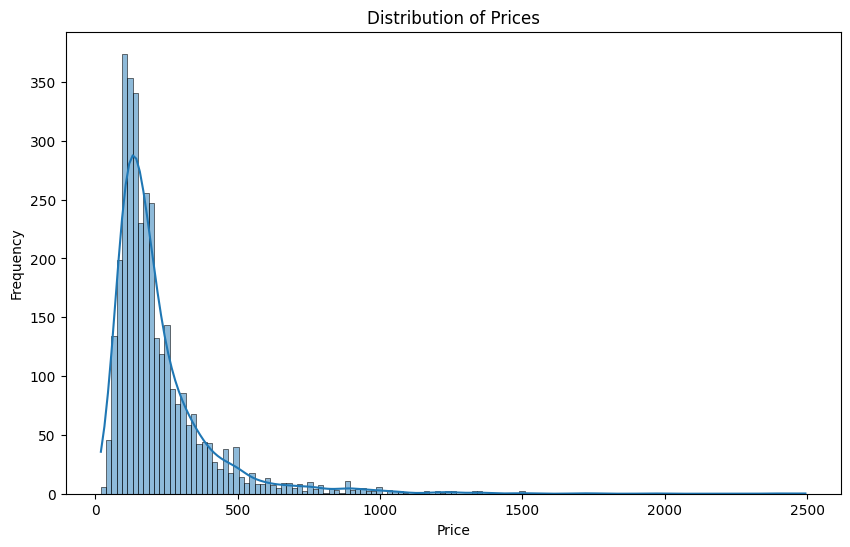

In [15]:
# DATA VISUALIATION USING MATPLOTLIB AND SEABORN

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

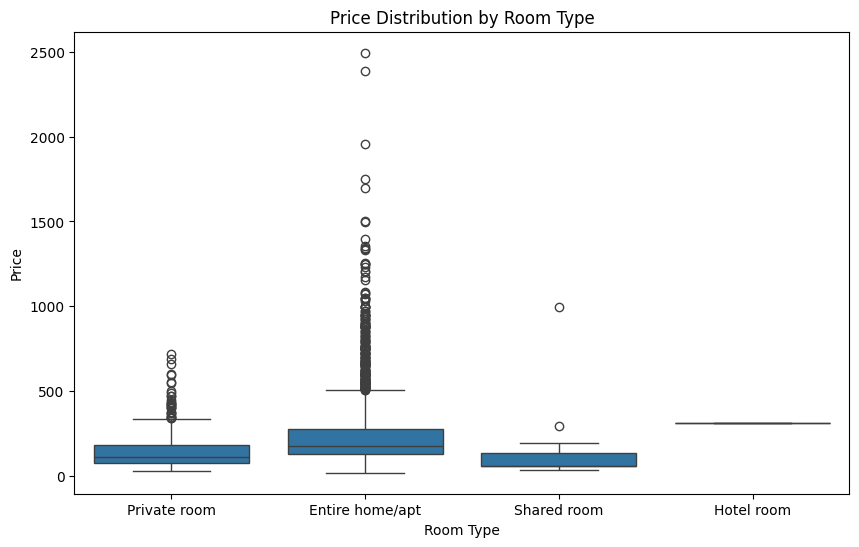

In [16]:
# 2. Boxplot for price vs room_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

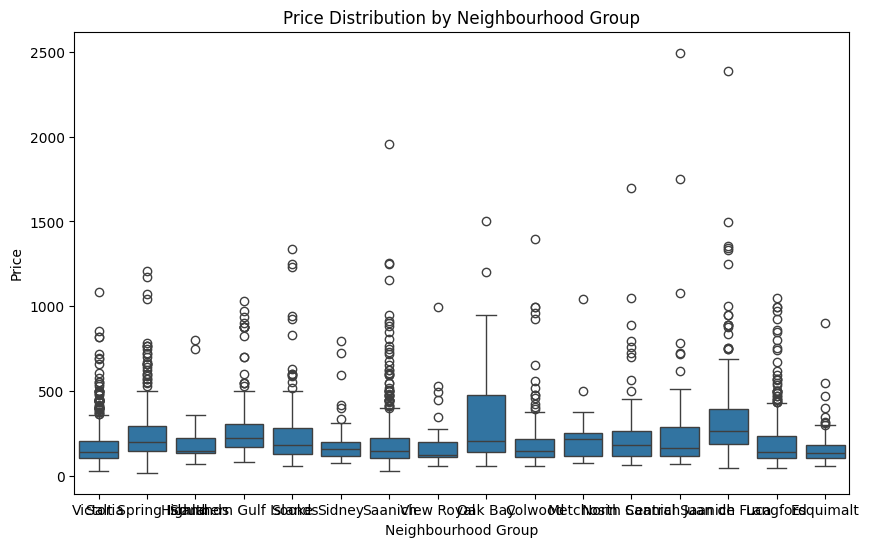

In [17]:
# 2. Boxplot for price vs neighbourhood_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

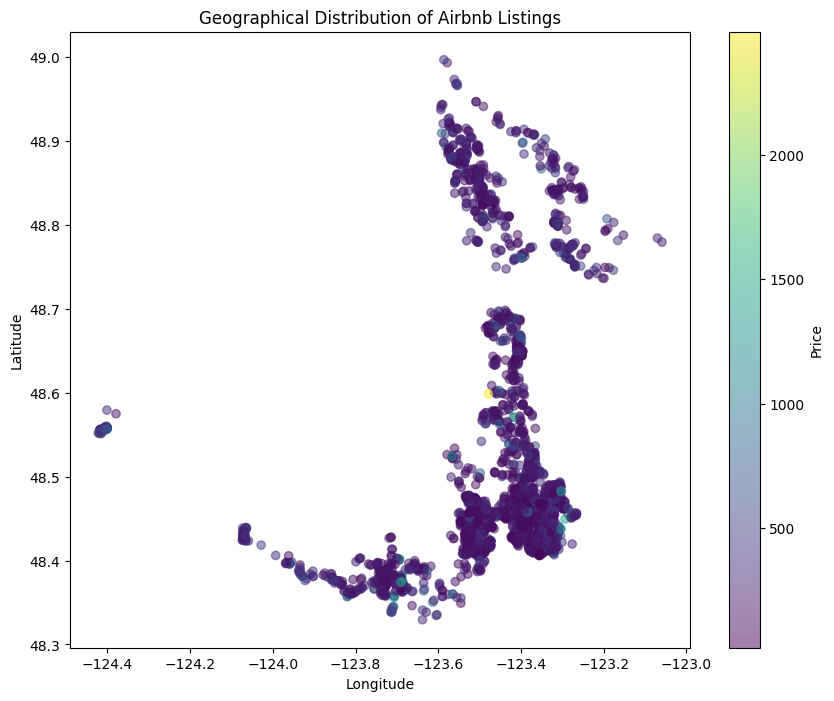

In [18]:
# 4. Scatter plot of listings based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['price'], cmap='viridis')
plt.colorbar(label='Price')
plt.title('Geographical Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

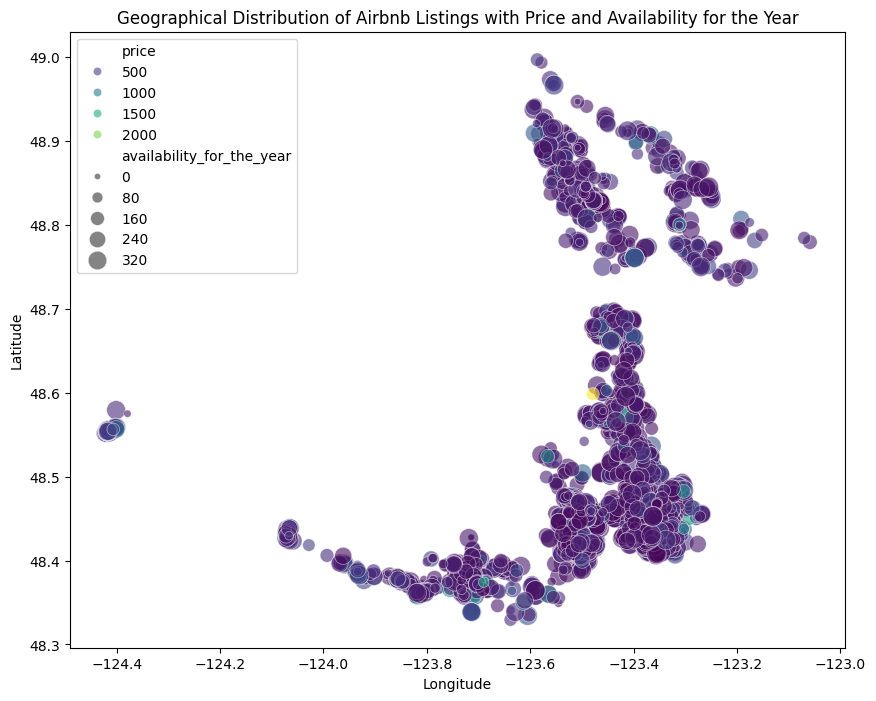

In [20]:
# Plotting using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='availability_for_the_year', data=df, sizes=(20, 200), palette='viridis', alpha=0.6)
plt.title('Geographical Distribution of Airbnb Listings with Price and Availability for the Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [23]:
# An interactive map centered around Victoria, save map as html file.
import folium

# Create a map centered around Victoria, BC
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Add points to the map
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Price: ${row['price']}, Room Type: {row['room_type']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Save map as an HTML file
m.save('airbnb_victoria_map.html')

In [24]:
# Save DataFrame to Excel
df.to_excel('cleaned_airbnb_listings.xlsx', index=False)